In [ ]:
# Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Dataset y su visualización
df = pd.read_csv("/content/drive/MyDrive/Prácticas Machine Learning/Práctica3-Regresión-Lineal-con-BGD-Machine-Learning/casas.csv")
df


,Terreno (m2),Precio (MDP)
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99
5,255.0,0.59
6,594.0,1.37
7,625.0,1.44
8,708.0,1.63
9,468.0,1.08


Iteración 1:
  w = 0.0008143827999999999
  y_test = [0.88 1.63 0.99]
  y_pred = [0.3102798468, 0.5765830223999999, 0.35099898679999997]
  Error de estimación = 2.262138144

Iteración 2:
  w = 0.00134054665030748
  y_test = [0.88 1.63 0.99]
  y_pred = [0.5107482737671498, 0.9491070284176958, 0.5777756062825239]
  Error de estimación = 1.4623690915326304

Iteración 3:
  w = 0.001680495378805175
  y_test = [0.88 1.63 0.99]
  y_pred = [0.6402687393247717, 1.1897907281940638, 0.7242935082650304]
  Error de estimación = 0.945647024216134

Iteración 4:
  w = 0.0019001325468463942
  y_test = [0.88 1.63 0.99]
  y_pred = [0.7239505003484762, 1.3452938431672472, 0.8189571276907959]
  Error de estimación = 0.6117985287934806



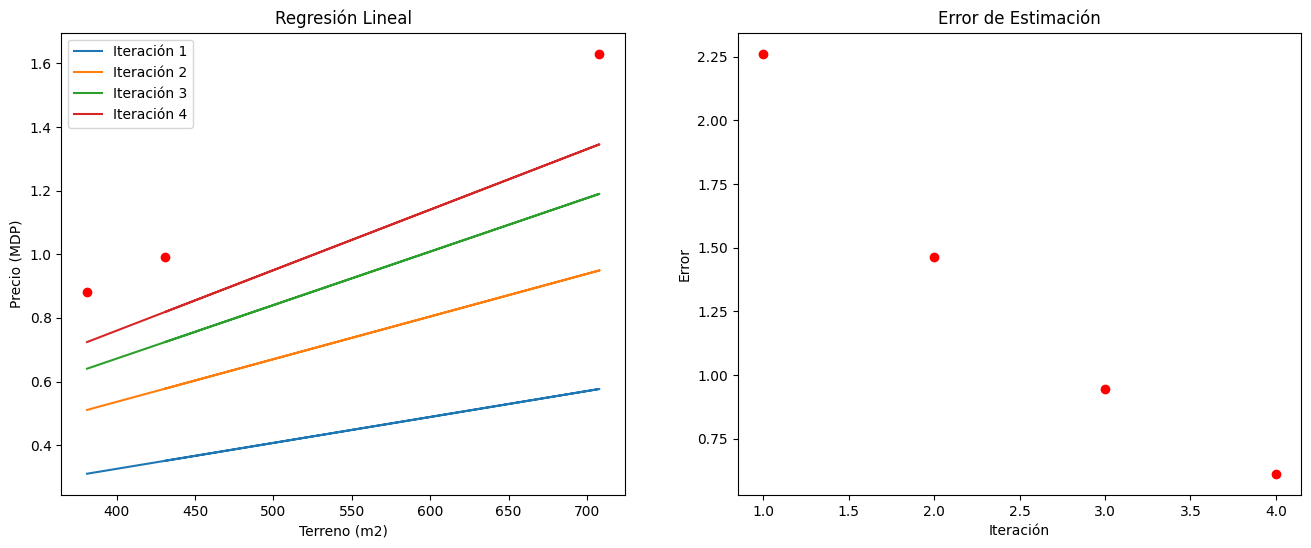

In [ ]:
# Asignamos las columnas

x = df['Terreno (m2)'].values
y = df['Precio (MDP)'].values

# Dividimos los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=0)

# Definimos la función (BGD)
def BGD(x, y, x_test, y_test, iters, alpha, weight):
    wi = 0
    sumA = 0
    preds = []
    errors = []
    wi_values = []

# Proceso de BGD para el número de iteraciones
    for iteration in range(iters):
        for j in range(len(x)):
            sumA += ((wi * x[j]) - y[j]) * x[j]
        wi = wi - alpha * (2 * sumA)
        wi = wi - weight
        weight = wi

# Calculo de las predicciones para el conjunto de prueba
        y_pred = [np.dot(xi, wi) for xi in x_test]
        preds.append(y_pred)

# Calculo de del error absoluto para el conjunto de prueba
        error = sum(abs((y_pred[k] - y_test[k])) for k in range(len(y_test)))
        errors.append(error)
        wi_values.append(wi)

# Imprimimos los valores de la iteracion
        print(f"Iteración {iteration + 1}:")
        print(f"  w = {wi}")
        print(f"  y_test = {y_test}")
        print(f"  y_pred = {y_pred}")
        print(f"  Error de estimación = {error}\n")

    return preds, errors, wi_values

# Definimos los parámetros para el entrenamiento
iters = 4            # Iteraciones para BGD
alpha = 0.00000007
weight = 0.0         # Peso inicial

# Funcion para BGD
preds, errors, wi_values = BGD(x_train, y_train, x_test, y_test, iters, alpha, weight)

# Graficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de regresión lineal
for i in range(iters):
    ax1.plot(x_test, preds[i], label=f'Iteración {i+1}')
ax1.scatter(x_test, y_test, color='red')
ax1.set_title('Regresión Lineal')
ax1.set_xlabel('Terreno (m2)')
ax1.set_ylabel('Precio (MDP)')
ax1.legend()

# Gráfico de error de estimación
ax2.scatter(np.arange(1, iters + 1), errors, color='red')
ax2.set_title('Error de Estimación')
ax2.set_xlabel('Iteración')
ax2.set_ylabel('Error')

plt.show()



# Programa 2

In [ ]:
# Programa 2 Dataset y visualización
datos = pd.read_csv('/content/drive/MyDrive/Prácticas Machine Learning/Práctica3-Regresión-Lineal-con-BGD-Machine-Learning/Dataset_multivariable.csv')
datos


,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2
5,1.0,1.4,-27.0,32.0,18.7,26.1
6,1.0,1.6,-30.0,36.0,20.4,29.0
7,1.0,1.8,-33.0,40.0,22.1,31.9
8,1.0,2.0,-36.0,44.0,23.8,34.8
9,1.0,2.2,-39.0,48.0,25.5,37.7


<ipython-input-10-22d86d62b120>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w0[id_x] -= 2 * alpha * suma_total





Pesos (w) en cada iteración:
Iteración 1:  [ 0.0020532   0.00308328 -0.0585684   0.0698784   0.04016964]
Iteración 2:  [ 0.00410623  0.00616604 -0.11358826  0.13371931  0.07918999]
Iteración 3:  [ 0.00615908  0.00924827 -0.16527457  0.19204436  0.11709392]
Iteración 4:  [ 0.00821177  0.01232999 -0.21382932  0.24533013  0.15391339]

Valores reales (y_test):
[[17.4]
 [34.8]
 [23.2]]

Predicciones en cada iteración (y_pred):
Iteración 1:  [3.00262613 6.14736919 4.05087382]
Iteración 2:  [ 5.80499764 11.87398673  7.827994  ]
Iteración 3:  [ 8.4218645  17.21132733 11.35168545]
Iteración 4:  [10.86682804 22.18839129 14.64068245]

Errores de Estimación en cada iteración:
Iteración 1:  [62.19913086]
Iteración 2:  [49.89302162]
Iteración 3:  [38.41512272]
Iteración 4:  [27.70409822]


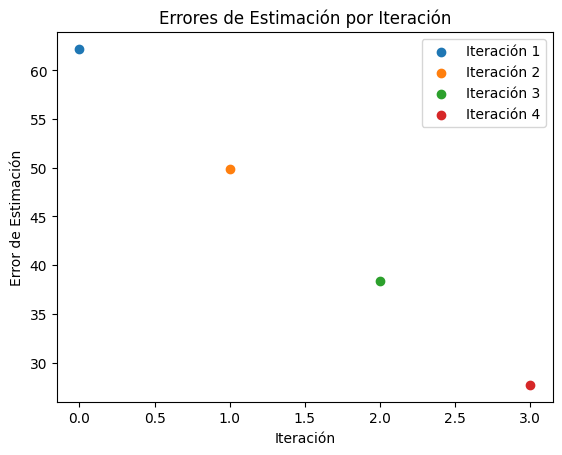

In [ ]:
# Dividimos los datos
x = datos.iloc[:, :-1]
y = datos.iloc[:, -1:]

# Dividimos los datos en conjuntos de entrenamiento(70%) y prueba(30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Función para calcular el error de aproximación.
def approximation_Error(x_test, y_test):
    error = 0
    for i in range(3):
        error += abs(x_test[i] - y_test[i])
    return error

# Función para realizar el (BGD).
def BGD(datos, w0, alpha):
    for id_x in range(len(w0)):
        suma_total = 0  # Inicializamos la suma de errores

        for j in range(len(datos)):
            suma_total += ((w0[id_x] * datos[j][id_x]) - y_train[j]) * datos[j][id_x]


        w0[id_x] -= 2 * alpha * suma_total
    return w0

# Parámetros iniciales
weight = np.zeros(5)  # Inicialización w en 0
alpha = 0.000006      # Tasa de aprendizaje
iters = 4           # Número de iteraciones

# Listas para almacenar los valores
weights = []
preds = []
errors = []

# Ejecución de las iteraciones de BGD
for iteracion in range(iters):
    weight = BGD(x_train, weight, alpha)
    weights.append(weight.copy())

    # Calculo las predicciones
    y_pred = np.dot(x_test, weight)
    preds.append(y_pred)

    # Calculo el error de estimación
    error_estimacion = approximation_Error(y_pred, y_test)
    errors.append(error_estimacion)

# Función para imprimir los resultados
def imprimir_resultados(arr, iters):
    for i in range(iters):
        print(f"Iteración {i + 1}: ", arr[i])

# Resultados de las iteraciones
# Pesos (w) en cada iteración
print("\n\n\nPesos (w) en cada iteración:")
imprimir_resultados(weights, iters)

# Valores reales (y_test)
print("\nValores reales (y_test):")
print(f"{y_test}")

# Predicciones en cada iteración (y_pred)
print("\nPredicciones en cada iteración (y_pred):")
imprimir_resultados(preds, iters)

# Errores de estimación en cada iteración
print("\nErrores de Estimación en cada iteración:")
imprimir_resultados(errors, iters)

# Gráfico error de estimacion
for i in range(iters):
    plt.scatter(i, errors[i], label=f'Iteración {i + 1}')

# Etiquetas gráfico
plt.xlabel('Iteración')
plt.ylabel('Error de Estimación')
plt.title('Errores de Estimación por Iteración')
plt.legend()
plt.show()
